## Data Preparation

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import os
import joblib
import random
from tqdm import tqdm
import cv2
import numpy as np

In [12]:
DATA_DIR = 'D:\Documents\CVPR\DataSets\Knife_vs_Pistol'

In [13]:
IMG_SIZE = 128
TRAIN_CATEGORIES = ['Knife','Pistol']
TEST_CATEGORIES = ['eval_Knife','eval_pistol']


In [14]:
training_data = []

for c in TRAIN_CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = TRAIN_CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 929.99it/s]

412


In [15]:
test_data = []

for c in TEST_CATEGORIES:
    path = os.path.join(DATA_DIR, c) 
    class_num = TEST_CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 499.56it/s]

25


In [16]:
random.shuffle(training_data)
random.shuffle(test_data)

In [17]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (412, 128, 128, 3) Y_train= (412,)


In [18]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (25, 128, 128, 3) Y_test= (25,)


## Sample Image

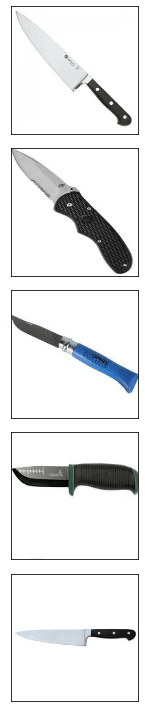

In [10]:
import matplotlib.pyplot as plt
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

## CNN Model

In [20]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=(1,1), padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=(1,1), padding='same'),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 952576)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               121929856 
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [21]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [22]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train, y=Y_train, 
              epochs=10, 
              validation_split=0.2,
              batch_size=64,
              callbacks=[cb]
             )

Epoch 1/10
6/6 [==============================] - 59s 9s/step - loss: 10237.3388 - accuracy: 0.5891 - val_loss: 323.3712 - val_accuracy: 0.2651
Epoch 2/10
6/6 [==============================] - 24s 4s/step - loss: 448.6427 - accuracy: 0.4968 - val_loss: 34.6816 - val_accuracy: 0.8193
Epoch 3/10
6/6 [==============================] - 22s 4s/step - loss: 50.4774 - accuracy: 0.6961 - val_loss: 9.3114 - val_accuracy: 0.8072
Epoch 4/10
6/6 [==============================] - 22s 4s/step - loss: 4.4297 - accuracy: 0.8013 - val_loss: 5.5882 - val_accuracy: 0.7590
Epoch 5/10
6/6 [==============================] - 23s 4s/step - loss: 2.1741 - accuracy: 0.8219 - val_loss: 1.1603 - val_accuracy: 0.7229
Epoch 6/10
6/6 [==============================] - 23s 4s/step - loss: 1.5010 - accuracy: 0.7778 - val_loss: 0.8878 - val_accuracy: 0.8072
Epoch 7/10
6/6 [==============================] - 24s 4s/step - loss: 0.7305 - accuracy: 0.8705 - val_loss: 0.7005 - val_accuracy: 0.7952
Epoch 8/10
6/6 [========

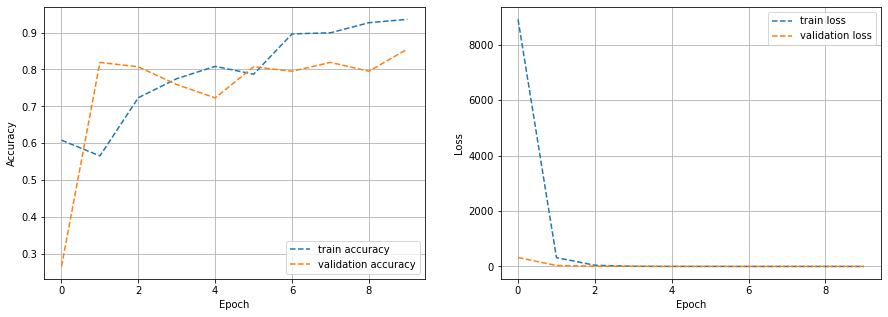

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()